<a href="https://colab.research.google.com/github/PollyBecker/CelsiusFahrenheit/blob/main/trabalho_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pickle
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carregar o Corpus FakeBr
path = '/content/drive/MyDrive/Fake.br-Corpus-master.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()


In [ ]:
fake_meta_list = []
folder_path = '/content/Fake.br-Corpus-master/full_texts/fake-meta-information/'

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None, encoding='utf-8-sig')
    fake_meta_list.append(df.transpose())  # Transpose the DataFrame before appending

fake_meta_df = pd.concat(fake_meta_list, ignore_index=True)

In [ ]:
true_meta_list = []
folder_path = '/content/Fake.br-Corpus-master/full_texts/true-meta-information/'

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, header=None, encoding='utf-8-sig', delimiter=';')  # Adjust delimiter if needed
        true_meta_list.append(df.transpose())
    except pd.errors.ParserError:
        print(f"Error parsing file: {file_path}")

true_meta_df = pd.concat(true_meta_list, ignore_index=True)

In [ ]:
true_list = []
folder_path = '/content/Fake.br-Corpus-master/full_texts/true/'

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            true_list.append([content])  # Adding the content as a single-item list
    except Exception as e:
        print(f"Error reading file: {file_path}\nError: {e}")

true_df = pd.DataFrame(true_list, columns=['content'])

In [ ]:
fake_list = []
folder_path = '/content/Fake.br-Corpus-master/full_texts/fake/'

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            fake_list.append([content])  # Adding the content as a single-item list
    except Exception as e:
        print(f"Error reading file: {file_path}\nError: {e}")

fake_df = pd.DataFrame(fake_list, columns=['content'])


In [ ]:
true_final_df = pd.concat([true_meta_df, true_df], axis=1)
true_final_df["Tags"]=0
true_final_df = true_final_df.dropna(subset=['content'])

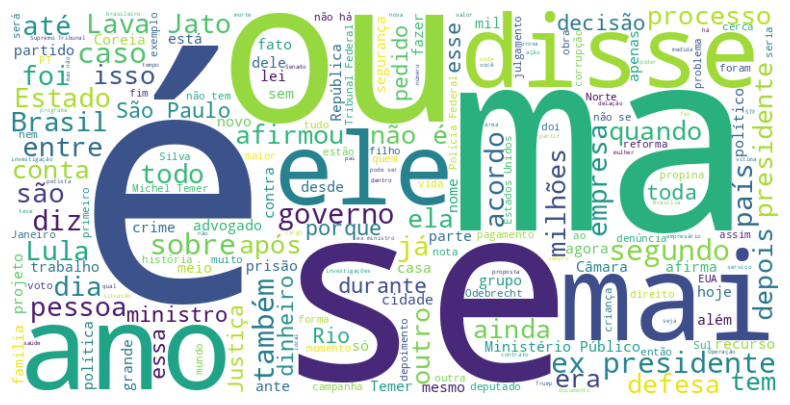

In [ ]:
# nuvem de palavras verdadeiras
stopwords = set(STOPWORDS)
stopwords.update(["de", "da", "do", "dos", "das", "um", "uma", "uns", "umas",
                  "para", "que", "com", "como", "no", "na", "nos", "nas",
                  "seu", "sua", "seus", "suas", "o", "a", "os", "as", "em","e","por"])
text = " ".join(true_final_df["content"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=800, height=400).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
fake_final_df = pd.concat([fake_meta_df, fake_df], axis=1)
fake_final_df["Tags"]= 1

In [ ]:
import random

# definir uma função que gera a cor
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
  r = random.randint(0, 255)
  return f"rgb({r}, 0, 0)"

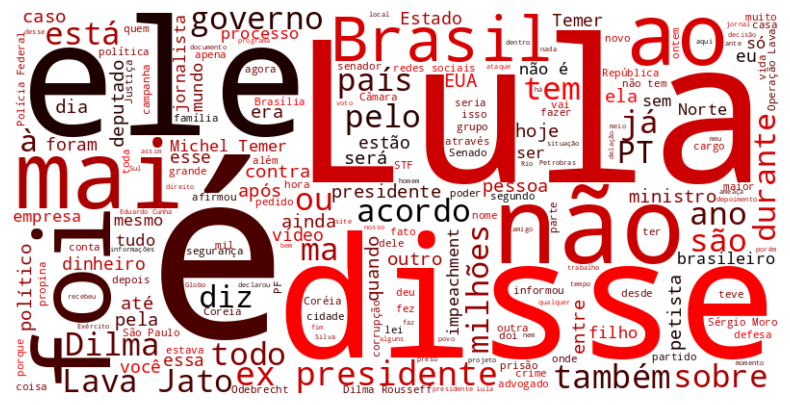

In [ ]:
# nuvens de palavras fake
stopwords = set(STOPWORDS)
stopwords.update(["de", "da", "do", "dos", "das", "um", "uma", "uns", "umas",
                  "para", "que", "com", "como", "no", "na", "nos", "nas",
                  "seu", "sua", "seus", "suas", "o", "a", "os", "as", "em","e","por","se"])
text2 = " ".join(fake_final_df["content"])
wordcloud2 = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=800, height=400,color_func=red_color_func).generate(text2)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
final_df = pd.concat([fake_final_df, true_final_df], axis=0)

In [ ]:
new_column_names = {
    0: 'author',
    1: 'link',
    2: 'category',
    3: 'date of publication',
    4: 'number of tokens',
    5: 'number of words without punctuation',
    6: 'number of types',
    7: 'number of links inside the news',
    8: 'number of words in upper case',
    9: 'number of verbs',
    10: 'number of subjunctive and imperative verbs',
    11: 'number of nouns',
    12: 'number of adjectives',
    13: 'number of adverbs',
    14: 'number of modal verbs',
    15: 'number of singular first and second personal pronouns',
    16: 'number of plural first personal pronouns',
    17: 'number of pronouns',
    18: 'pausality',
    19: 'number of characters',
    20: 'average sentence length',
    21: 'average word length',
    22: 'percentage of news with spelling errors',
    23: 'emotiveness',
    24: 'diversity'

}
final_df.rename(columns=new_column_names, inplace=True)
final_df.head()

,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,...,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with spelling errors,emotiveness,diversity,content,Tags
0,None,http://www.topfivetv.com/2017/12/pela-primeira...,ciencia_tecnologia,2017-12-05,264,226,143,0,1,34,...,9,3.8,1211,22.6,5.35841,0.00884956,0.192308,0.632743,Dilma e o ponto eletrônico. Ex-presidenta irá ...,1
1,None,https://www.diariodobrasil.org/kim-jong-un-pro...,sociedade_cotidiano,22/08/2017,32,26,26,0,1,5,...,1,1.5,119,6.5,4.57692,0.0,0.142857,1.0,Mídia divulga que Janot pode ser candidato à P...,1
2,None,https://www.diariodobrasil.org/renan-virou-um-...,politica,30/11/2016,51,43,33,0,0,11,...,11,1.6,191,8.6,4.44186,0.0,0.210526,0.767442,Papai Noel da OI: Brasília age novamente na ca...,1
3,None,https://www.diariodobrasil.org/rebeliao-de-1-h...,politica,28/08/2017,165,145,104,1,3,22,...,7,2.5,709,18.125,4.88966,0.0,0.190476,0.717241,Experiência realizada com mosquitos transgênic...,1
4,None,https://www.diariodobrasil.org/quebra-cabeca-d...,politica,20/06/2016,236,210,147,0,6,33,...,4,2.6,1008,21.0,4.8,0.0,0.1875,0.7,"Trump sobre Fidel Castro: "" Morreu! "". . Ao c...",1


In [ ]:
important_columns = [
    'author',
    'category',
    'number of links inside the news',
    'number of words in upper case',
    'number of verbs',
    'number of subjunctive and imperative verbs',
    'number of nouns',
    'number of adjectives',
    'number of adverbs',
    'number of modal verbs',
    'number of singular first and second personal pronouns',
    'number of plural first personal pronouns',
    'pausality',
    'number of characters',
    'average sentence length',
    'average word length',
    'percentage of news with spelling errors',
    'emotiveness',
    'diversity',
    'content',
    'Tags'
]

In [ ]:
final_data = final_df[important_columns]

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    text = unidecode(text)  # Remover acentos
    text = re.sub(r'\W+', ' ', text)  # Remover caracteres especiais
    tokens = word_tokenize(text.lower())  # Tokenização e conversão para minúsculas
    tokens = [word for word in tokens if word.isalpha()]  # Remover números
    tokens = [word for word in tokens if word not in stopwords.words('portuguese')]  # Remover stopwords
    return ' '.join(tokens)


In [ ]:
final_data['text_preprocessed'] = final_data['content'].apply(preprocess_text)

In [ ]:
#Dividindo dados em treino e teste
train_df, test_df = train_test_split(final_data, test_size=0.25, stratify=final_data['Tags'], random_state=42)

In [ ]:
#Vetorização dos textos
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['text_preprocessed'])
X_test = tfidf_vectorizer.transform(test_df['text_preprocessed'])
y_train = train_df['Tags']
y_test = test_df['Tags']

In [ ]:
#Treinando o modelo de e verificando os meus resultasod
model = SVC(kernel='linear', random_state=42, gamma=1)
model.fit(X_train, y_train)

SVC(gamma=1, kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.97
